In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df = pd.read_hdf('Global_Weather_Data/big_data.h5')
df.head()

,mean_temperature_7,mean_temperature_6,mean_temperature_5,mean_temperature_4,mean_temperature_3,mean_temperature_2,mean_temperature_1,day_of_year,altitude,latitude,...,wind_speed_0_2,wind_speed_0_3,wind_speed_0_4,wind_speed_0_5,wind_speed_0_6,wind_speed_0_7,wind_speed_0_8,wind_speed_0_9,wind_speed_0_10,wind_speed_0_11
3,299.906042,301.140417,299.718333,299.908125,300.634792,302.856458,302.795433,275,1148,29.558050,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
6,296.587500,296.475000,297.020000,296.770833,297.652500,297.247500,301.199792,276,2474,31.769039,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,298.190000,297.607500,298.117500,298.035417,298.867500,298.677500,300.139167,276,46,33.005859,...,6.0,6.0,6.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0
8,298.190000,297.607500,298.117500,298.035417,298.867500,298.677500,300.197708,276,33,32.815559,...,6.0,6.0,6.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0
9,298.917917,299.906042,301.140417,299.718333,299.908125,300.634792,302.856458,276,1148,29.558050,...,5.0,3.0,3.0,7.0,7.0,7.0,6.0,5.0,8.0,6.0


In [3]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

In [4]:
n_pred = 7

df_mean = df.mean()
df_std = df.std()
df = (df-df.mean())/df.std()
X = df.iloc[:,n_pred:].reset_index(drop=True)

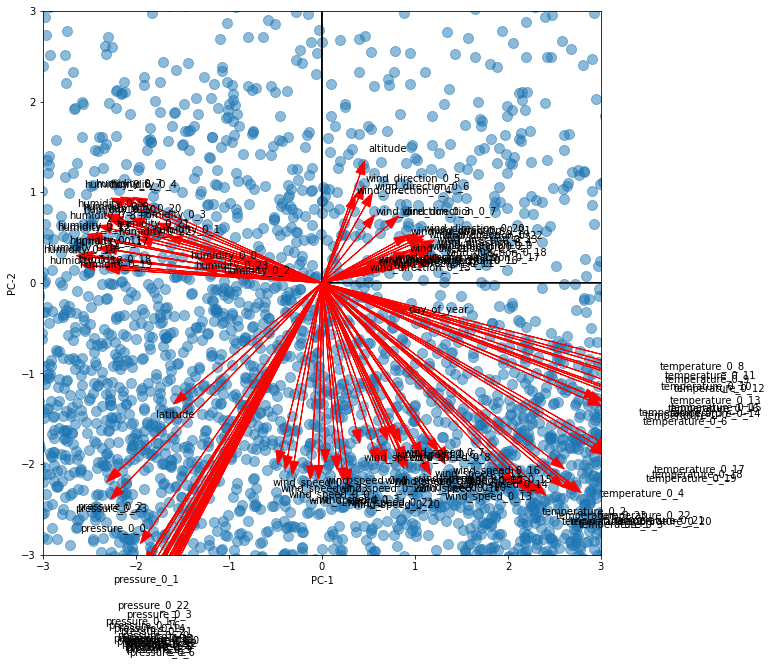

In [14]:
PVE = biplot(X,123,1,2,scale=20,alpha=0.5,s=100)

<AxesSubplot:>

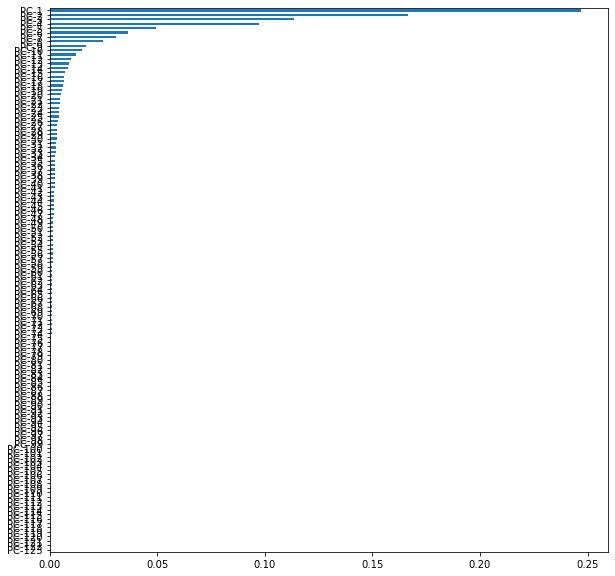

In [19]:
PVE.sort_values().plot.barh(figsize=(10,10))

In [20]:
PVE_list = PVE.sort_values(ascending=False)

In [33]:
sum = 0
limit = 0.99
for i in range(PVE_list.shape[0]):
    sum = sum+PVE_list[i]
    if(sum>limit):
        break
print('# Comp:\t',i,'\nSum:\t',sum)

# Comp:	 81 
Sum:	 0.9902052525410451
